<a href="https://colab.research.google.com/github/shinasto/awk/blob/main/%EC%9A%94%EC%B2%AD_%EC%A7%91%EA%B3%84%EB%A1%9C_%EA%B7%B8%EB%9E%98%ED%94%84_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import dateutil
import numpy as np
import datetime
from datetime import datetime
import pandas as pd
from pandas import DataFrame

reqData = pd.read_csv('https://raw.githubusercontent.com/shinasto/scikit-learn/main/data/request_data', sep=" ")
print(reqData.head())

       time     req     res         act
0  00:00:00   req=8   res=8  activeTX=0
1  00:00:01  req=23  res=23  activeTX=0
2  00:00:02  req=11  res=11  activeTX=0
3  00:00:03   req=7   res=7  activeTX=0
4  00:00:04  req=10  res=10  activeTX=0


In [96]:
print(reqData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55144 entries, 0 to 55143
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    55144 non-null  object
 1   req     55144 non-null  object
 2   res     55144 non-null  object
 3   act     55144 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB
None


In [82]:
# 전처리 
# 요청, 응답, TX의 개수를 추출

df = DataFrame()
df['reqCnt'] = reqData.req.str.split('=').str[1].astype(int)
df['resCnt'] = reqData.res.str.split('=').str[1].astype(int)
df['actCnt'] = reqData.act.str.split('=').str[1].astype(int)

# 날짜 str를 datatime 포멧으로 변경
df['df'] = pd.to_datetime(reqData['time'])

print(df.shape)
print(df.head())

(55144, 4)
   reqCnt  resCnt  actCnt                  df
0       8       8       0 2021-09-06 00:00:00
1      23      23       0 2021-09-06 00:00:01
2      11      11       0 2021-09-06 00:00:02
3       7       7       0 2021-09-06 00:00:03
4      10      10       0 2021-09-06 00:00:04


In [93]:
# 열에 대한 간략한 통계정보 출력
print(df.describe())

             reqCnt        resCnt        actCnt
count  55144.000000  55144.000000  55144.000000
mean      44.743762     44.743762    215.987904
std       70.818640     70.963203    401.282909
min        0.000000      0.000000      0.000000
25%        3.000000      3.000000      0.000000
50%        5.000000      5.000000      0.000000
75%       95.000000     93.000000    130.250000
max      662.000000    433.000000   1024.000000


In [83]:
# 데이터를 row를 기반으로 분리

df_1 = df.iloc[:22000,:]
df_2 = df.iloc[22001:,:]

print(df_1.shape)
print(df_1.head())
print(df_2.shape)
print(df_2.head())

(22000, 4)
   reqCnt  resCnt  actCnt                  df
0       8       8       0 2021-09-06 00:00:00
1      23      23       0 2021-09-06 00:00:01
2      11      11       0 2021-09-06 00:00:02
3       7       7       0 2021-09-06 00:00:03
4      10      10       0 2021-09-06 00:00:04
(33143, 4)
       reqCnt  resCnt  actCnt                  df
22001      13      12       1 2021-09-06 07:47:31
22002      14      15       0 2021-09-06 07:47:32
22003       5       5       0 2021-09-06 07:47:33
22004       4       4       0 2021-09-06 07:47:36
22005       2       1       1 2021-09-06 07:47:37


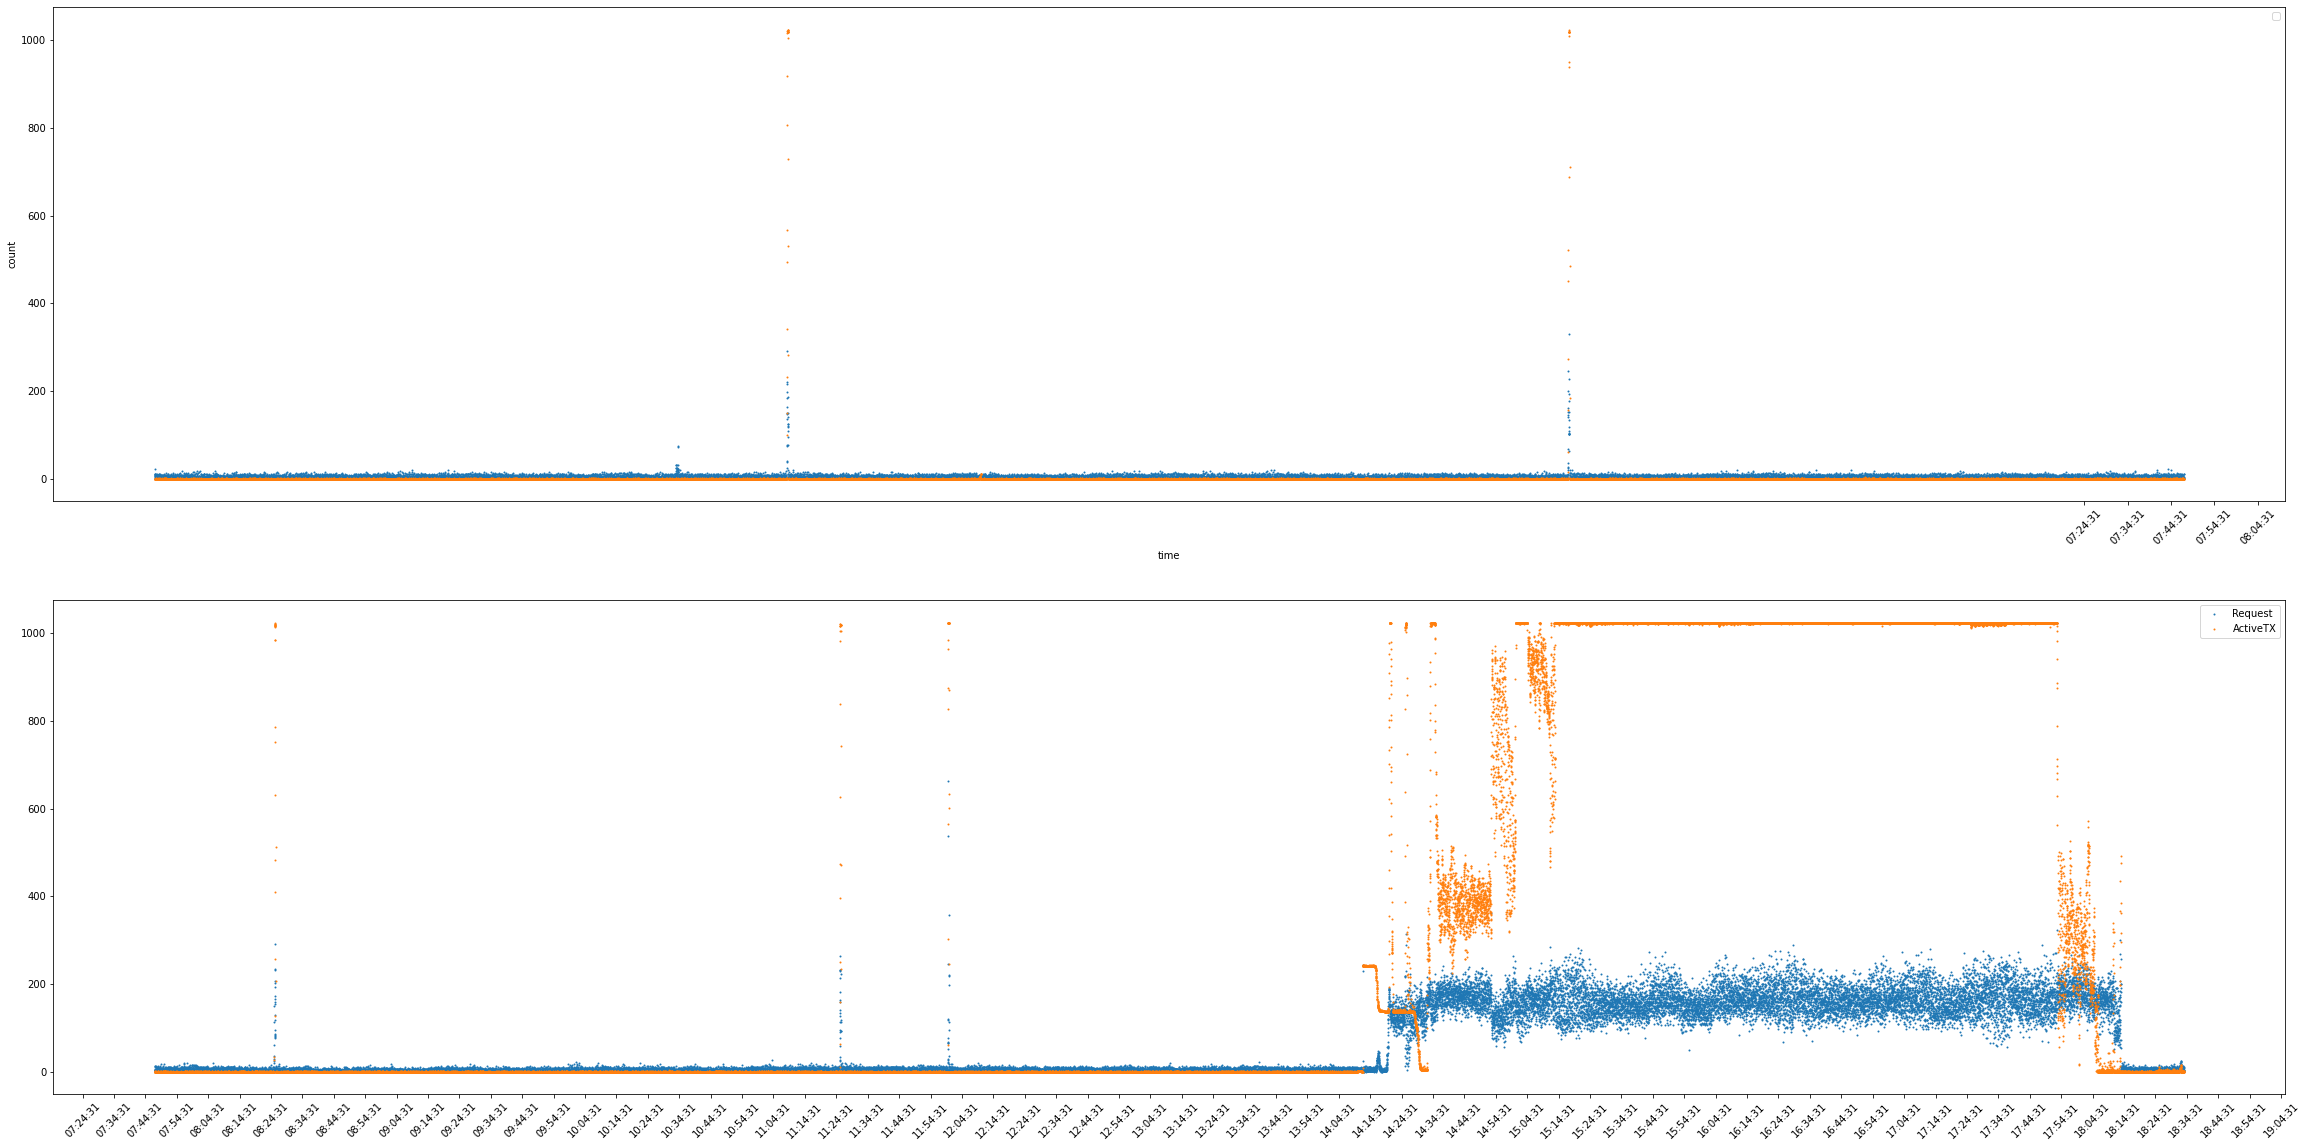

In [92]:
# tick every 5th easter
rule = rrulewrapper(dateutil.rrule.MINUTELY, interval=10)
loc = RRuleLocator(rule)
formatter = DateFormatter('%H:%M:%S')


fig, ax = plt.subplots(2, 1)
# axes-1
plt.rcParams["figure.figsize"] = (40,20)

ax[0].xaxis.set_major_locator(loc)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].xaxis.set_tick_params(rotation=45, labelsize=10)

ax[0].legend(['aaa', 'bbb'])
ax[0].set_xlabel('time')
ax[0].set_ylabel('count')
ax[0].plot_date(df_1['df'], df_1['reqCnt'], markersize=1)
ax[0].plot_date(df_1['df'], df_1['actCnt'], markersize=1)
#plt.plot_date(df_1['df'], df_1['resCnt'], markersize=1)

# axes-1
ax[1].xaxis.set_major_locator(loc)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].xaxis.set_tick_params(rotation=45, labelsize=10)

ax[1].plot_date(df_2['df'], df_2['reqCnt'], markersize=1)
ax[1].plot_date(df_2['df'], df_2['actCnt'], markersize=1)
#plt.plot_date(df_2['df'], df_2['resCnt'], markersize=1)

plt.legend(['Request', 'ActiveTX'])
plt.show()